## Dataset can be download
https://drive.google.com/file/d/1Pat34QLGrvJlne6L6LF8l5YRUqN6lw8F/view?usp=sharing

In [1]:
import os

base_dir = './data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

/home/ubuntu/anaconda/envs/py36-venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [17]:
from keras.utils import plot_model

plot_model(model, to_file="lenet.png", show_shapes=True)

In [7]:
from keras import  optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/25
100/100 [==============================] - 12s 123ms/step - loss: 0.6834 - acc: 0.5555 - val_loss: 0.6571 - val_acc: 0.6020
Epoch 2/25
100/100 [==============================] - 8s 81ms/step - loss: 0.6461 - acc: 0.6205 - val_loss: 0.6285 - val_acc: 0.6570
Epoch 3/25
100/100 [==============================] - 8s 80ms/step - loss: 0.5803 - acc: 0.7050 - val_loss: 0.6055 - val_acc: 0.6710
Epoch 4/25
100/100 [==============================] - 8s 80ms/step - loss: 0.5451 - acc: 0.7180 - val_loss: 0.5960 - val_acc: 0.6680
Epoch 5/25
100/100 [==============================] - 8s 80ms/step - loss: 0.5097 - acc: 0.7465 - val_loss: 0.5890 - val_acc: 0.6960
Epoch 6/25
100/100 [==============================] - 8s 80ms/step - loss: 0.4721 - acc: 0.7710 - val_loss: 0.5599 - val_acc: 0.7070
Epoch 7/25
100/100 [==============================] - 8s 83ms/step - loss: 0.4432 - acc: 0.7945 - val_loss: 0.5784 - val_acc: 0.6950
Epoch 8/25
100/100 [==============================] - 8s 80ms/step 

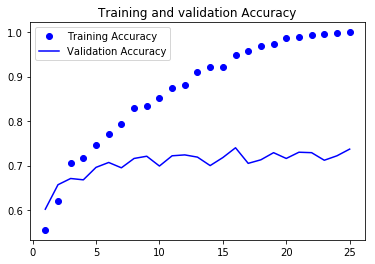

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

plt.show()

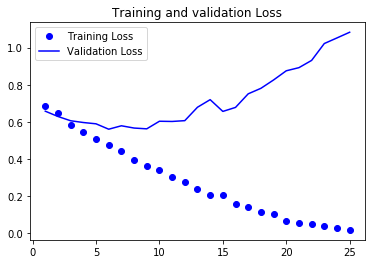

In [10]:
import matplotlib.pyplot as plt

acc = history.history['loss']
val_acc = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training Loss')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()